<a href="https://colab.research.google.com/github/HyeonhoonLee/KIOM_KDC/blob/master/KDC_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KIOM 한의임상정보은행 data 분석하기

일단 데이터를 추출해서 상관분석을 전부 돌려보자.

# 라이브러리 로드

In [346]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn 을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정을 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#한글 폰트 설정

In [347]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나눔고딕 설치
# 이 코드를 사용시 아래에 있는 폰트를 로드할 경우 colab에서는 오류가 발생하니
# 아래에 있는 폰트 설정은 꼭 주석처리를 해주세요. 
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

fm._rebuild()

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [348]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format = 'retina'

#데이터 불러오기

- 데이터 로드 주소: https://www.data.go.kr/data/3072201/fileData.do
- 임상정보은행 사이트에서 상세이용방법 확인가능 (https://kdc.kiom.re.kr/html/?pmode=subpage&MMC_pid=200&spSeq=22)

In [349]:
# 다운로드 받은 파일을 판다스의 read_csv 를 통해 읽어옵니다.
# 파일을 읽어온 후 shape 로 행과 열의 수를 출력합니다.

##UTF-8이 아니면, encoding=에다가 cp949나 euc-kr을 넣어줘야한다.
df = pd.read_csv("/content/drive/My Drive/DataCollection/KIOM_KDC/data/한의임상정보은행 교육용 데이터 (2016.10.27)..csv", encoding="cp949")
df.shape

(500, 73)

In [350]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.sample(5)

,대상자식별코드,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
113,KDCT00114,2,39.726,14,4,2,999,999,1,1,1,1,1,1,1,1,1,3,3,2,1,3,3,3,1,1,4,3,1,2,2,999,999,1.0,3,3,3,3,2,1,8,1,1,1,1,2,5,0,2,1,0,0,0,0,3,155.0,57.0,23.7,56.0,32.5,85.6,88.5,78.0,84.8,85.5,88.3,110,70,91,185,62,62,95
163,KDCT00164,2,59.942,14,4,2,999,999,2,1,2,1,2,3,2,1,2,2,2,1,2,2,3,999,1,3,2,2,2,2,2,999,999,3.0,3,2,3,3,2,2,11,2,1,1,1,4,7,0,4,0,0,1,0,0,3,156.0,60.0,24.7,55.8,35.6,89.0,95.5,84.6,86.7,98.5,98.8,112,69,90,211,130,60,109
187,KDCT00188,1,73.115,6,1,2,999,999,3,1,3,3,3,3,3,2,3,1,2,3,2,1,2,3,3,1,2,2,2,2,1,999,999,1.0,1,2,2,2,3,1,9,1,2,1,1,4,4,0,2,0,0,1,0,0,3,158.0,51.0,20.4,52.1,34.1,88.2,90.3,78.9,74.2,78.0,79.3,120,70,111,192,84,48,116
253,KDCT00254,2,80.784,14,1,2,999,999,1,1,1,1,1,2,1,2,3,3,3,1,1,2,2,3,3,3,4,2,2,2,3,1,1,3.0,1,2,2,2,3,3,10,2,2,1,1,3,5,0,3,0,0,0,0,1,3,155.0,56.0,23.3,55.0,35.0,88.0,91.0,84.0,88.0,99.0,98.0,110,75,84,147,113,28,94
129,KDCT00130,2,39.811,6,3,2,999,999,2,1,3,3,3,3,2,3,3,3,2,3,3,1,1,2,1,3,2,3,1,1,2,999,999,0.0,1,1,2,3,3,2,11,2,1,1,1,3,8,0,2,1,0,1,0,0,1,153.9,60.4,25.5,53.0,32.0,91.0,93.0,79.0,75.0,84.0,93.0,115,70,116,216,159,76,106


#기본정보 보기

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   대상자식별코드        500 non-null    object 
 1   성별             500 non-null    int64  
 2   만나이            500 non-null    float64
 3   직업분류           500 non-null    int64  
 4   학력             500 non-null    int64  
 5   결혼유무           500 non-null    int64  
 6   음주력            500 non-null    int64  
 7   흡연력            500 non-null    int64  
 8   성격_대범_섬세       500 non-null    int64  
 9   성격_행동빠름_행동느림   500 non-null    int64  
 10  성격_적극_소극       500 non-null    int64  
 11  성격_직접_간접       500 non-null    int64  
 12  성격_포기빠름_포기느림   500 non-null    int64  
 13  성격_외향_내성       500 non-null    int64  
 14  성격_동적_정적       500 non-null    int64  
 15  성격_쉽게_어렵게      500 non-null    int64  
 16  성격_남성적_여성적     500 non-null    int64  
 17  성격_참을성부족_잘찾음   500 non-null    int64  
 18  성격_큰편_적은편 

In [352]:
# 컬럼들을 한번에 확인합니다.
df.columns

Index(['대상자식별코드', '성별', '만나이', '직업분류', '학력', '결혼유무', '음주력', '흡연력', '성격_대범_섬세',
       '성격_행동빠름_행동느림', '성격_적극_소극', '성격_직접_간접', '성격_포기빠름_포기느림', '성격_외향_내성',
       '성격_동적_정적', '성격_쉽게_어렵게', '성격_남성적_여성적', '성격_참을성부족_잘찾음', '성격_큰편_적은편',
       '성격_잘드러냄_안드러냄', '성격_잘표현_표현안하는편', '성격_가끔흥분_이성적', '성격_덜렁_꼼꼼', '식사량',
       '식사속도', '소화여부', '소화입맛', '땀정도', '땀기분', '대변습관', '대변굳기', '배변시긴박감',
       '배변후잔변감', '소변야간뇨', '한열민감도', '한열손부위', '한열발부위', '한열배부위', '음수정도', '음수온다',
       '한열점수', '한열그룹', '고혈압_진단', '당뇨_진단', '고지혈증_진단', '일반건강', '수면시간(시간)',
       '수면시간(분)', '피로정도', '피로_기상시', '피로_오전', '피로_오후', '피로_밤', '피로_하루종일',
       '한의사체질진단', '키', '몸무게', 'BMI', '이마둘레', '목둘레', '겨드랑이둘레', '가슴둘레', '늑골둘레',
       '허리둘레', '장골둘레', '곡골둘레', '수축기혈합', '이완기혈압', '혈당', '총콜레스테롤', '중성지방',
       '고밀도콜레스테롤', '저밀도콜레스테롤'],
      dtype='object')

In [353]:
# dtypes 를 통해 데이터 형식만 출력합니다.
df.dtypes

대상자식별코드      object
성별            int64
만나이         float64
직업분류          int64
학력            int64
             ...   
혈당            int64
총콜레스테롤        int64
중성지방          int64
고밀도콜레스테롤      int64
저밀도콜레스테롤      int64
Length: 73, dtype: object

#Feature engineering

In [354]:
# object type이 있는지 확인한다.
df.describe(include="object")

,대상자식별코드
count,500
unique,500
top,KDCT00445
freq,1


In [355]:
# 일단,"대상자식별코드"컬럼은 index로 바꿔줍니다.
df = df.set_index("대상자식별코드")
df.head()

,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
대상자식별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,48.666,2,5,2,999,999,2,2,1,2,1,1,1,2,2,3,2,2,2,1,1,2,2,1,3,3,1,1,2,999,999,1.0,1,2,2,2,2,2,12,2,1,1,1,3,5,0,2,0,0,0,1,0,2,158.0,55.0,22.0,53.0,33.0,92.0,96.0,89.0,82.0,91.0,96.0,120,80,104,219,72,60,128
KDCT00002,2,80.773,14,3,2,999,999,1,1,1,1,1,1,1,2,1,3,1,1,1,1,3,2,2,1,3,1,2,1,2,999,999,1.0,2,2,2,2,2,3,13,3,1,1,1,3,5,0,4,0,0,1,0,0,3,155.0,63.0,26.2,59.0,35.0,96.0,101.0,93.0,92.0,96.0,99.0,124,65,110,199,97,46,114
KDCT00003,1,50.008,3,3,2,999,999,3,1,1,1,1,1,1,1,1,2,1,1,1,1,3,3,2,3,2,3,1,1,2,999,999,1.0,3,2,3,2,2,2,12,2,1,1,1,3,7,0,2,0,0,1,0,0,2,160.0,59.0,23.0,57.0,37.0,95.0,90.0,83.0,80.0,81.0,81.0,121,75,79,216,88,49,132
KDCT00004,2,50.551,14,4,2,999,999,1,1,1,1,1,1,1,2,1,1,1,2,1,1,2,999,1,3,2,2,3,2,2,999,999,1.0,2,2,2,2,1,2,15,3,1,1,1,4,7,0,4,0,0,1,0,0,2,165.0,76.0,27.9,59.0,37.0,100.0,104.0,90.0,91.0,94.0,99.0,113,81,100,218,136,44,136
KDCT00005,1,49.581,8,2,2,999,999,3,2,3,2,2,3,2,2,2,3,3,2,2,2,1,2,1,1,3,1,2,1,2,999,999,0.0,1,3,3,2,1,2,11,2,1,1,1,2,5,0,4,0,0,1,0,0,1,165.0,70.0,25.7,60.0,40.0,106.0,102.0,99.0,98.0,98.0,100.0,129,72,92,186,61,33,118


## 수치형 변수를 범주형 변수로 바꾸기

In [356]:
#1 수면시간(시간)을 2개의 범주형 변수로 나누어본다.
df["수면시간(시간)_부족"] = df["수면시간(시간)"] < 6
df[["수면시간(시간)_부족", "수면시간(시간)"]].head()

,수면시간(시간)_부족,수면시간(시간)
대상자식별코드,,
KDCT00001,True,5
KDCT00002,True,5
KDCT00003,False,7
KDCT00004,False,7
KDCT00005,True,5


In [357]:
#2 늑골둘레를 3가지 범주형 변수로 나누어본다. ==> One-hot enconding
## 여기서는 수치 => 범주 => 수치 로 one-hot enconding이 되었는데, 
## one-hot encoding은 주로 범주=>수치 로 할 때 많이 사용한다.
# EDA displot 결과를 보고 임의로 70/80으로 나누어봤는데 모델 정확도가 오히려 떨어져서 70/90으로 바꾸어보았다.
df["늑골둘레_low"]=df["늑골둘레"]<70
df["늑골둘레_middle"]= (df["늑골둘레"]>=70) & (df["늑골둘레"]<85)
df["늑골둘레_high"]=df["늑골둘레"]>=85
df[["늑골둘레_low","늑골둘레_middle","늑골둘레_high"]].head()

,늑골둘레_low,늑골둘레_middle,늑골둘레_high
대상자식별코드,,,
KDCT00001,False,False,True
KDCT00002,False,False,True
KDCT00003,False,True,False
KDCT00004,False,False,True
KDCT00005,False,False,True


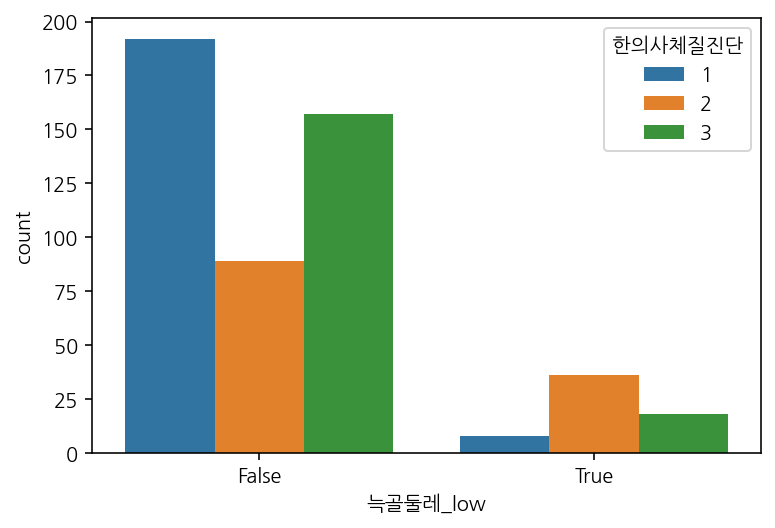

In [358]:
#2(cont') 위에서 나눈 것을 시각화해보자.
## low일 때 확연히 소음인이 많은 것을 확인할 수 있다.
sns.countplot(data=df, x="늑골둘레_low", hue="한의사체질진단")

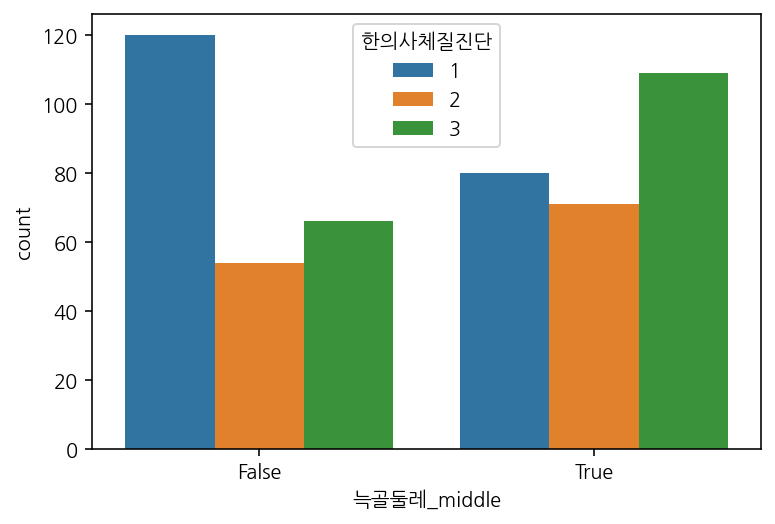

In [359]:
#2(cont') 위에서 나눈 것을 시각화해보자.
sns.countplot(data=df, x="늑골둘레_middle", hue="한의사체질진단")

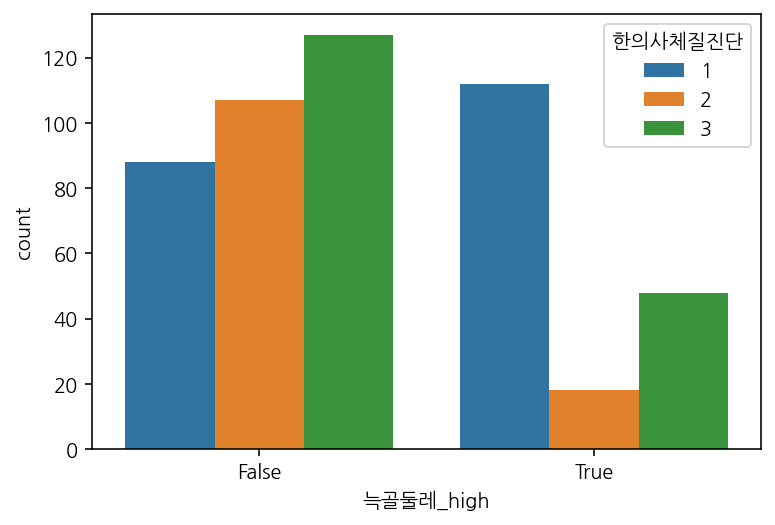

In [360]:
#2(cont') 위에서 나눈 것을 시각화해보자.
sns.countplot(data=df, x="늑골둘레_high", hue="한의사체질진단")

## 결측치 다루기

In [361]:
#아래의 코드로하면 결측치가 없는 것으로 보인다.
df.isnull().sum()

성별             0
만나이            0
직업분류           0
학력             0
결혼유무           0
              ..
저밀도콜레스테롤       0
수면시간(시간)_부족    0
늑골둘레_low       0
늑골둘레_middle    0
늑골둘레_high      0
Length: 76, dtype: int64

In [362]:
df.describe()

,성별,만나이,직업분류,학력,결혼유무,음주력,흡연력,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,수면시간(시간),수면시간(분),피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,한의사체질진단,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,늑골둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,혈당,총콜레스테롤,중성지방,고밀도콜레스테롤,저밀도콜레스테롤
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.672000,48.069266,8.882000,3.824000,1.858000,947.15600,947.188000,2.176000,1.65400,1.716000,1.886000,1.904000,2.184000,3.928000,4.058000,1.968000,2.346000,1.842000,2.162000,1.872000,1.704000,2.220000,159.592000,53.520000,1.554000,2.53600,2.176000,5.934000,1.412000,2.060000,466.864000,466.770000,0.964200,1.792000,2.102000,2.302000,2.302000,4.282000,2.016000,13.152000,3.996000,1.264000,1.086000,1.14600,5.384000,6.40000,3.020000,2.820000,0.268000,0.188000,0.438000,0.136000,0.112000,1.950000,160.97000,60.706400,23.371800,55.709400,34.745600,89.906400,90.988800,81.138000,83.340600,89.708600,93.276800,119.726000,76.18600,103.702000,191.040000,129.984000,54.122000,112.958000
std,0.469955,16.255799,5.192109,1.425865,0.571392,221.58271,221.445915,0.728069,0.73985,0.759274,0.859349,0.789957,0.821885,44.598485,44.592371,0.819952,0.784548,0.793912,0.846871,0.812981,0.790971,0.782832,363.982654,221.659757,0.869826,0.75488,0.803938,63.001556,0.492688,0.590845,497.599469,497.687394,1.038506,0.798757,0.827627,0.772003,0.715416,44.582796,0.759538,44.264156,44.594229,0.441241,0.280645,0.35346,44.532672,1.34894,9.167753,0.917215,0.443361,0.391103,0.496638,0.343132,0.315682,0.865447,7.97925,10.357766,3.255029,1.921947,3.280354,7.874771,8.271645,9.230041,9.532691,7.728651,6.574386,15.963979,11.14036,74.271891,71.488486,105.400162,74.508322,75.288385
min,1.000000,10.008000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,140.00000,32.000000,15.600000,51.000000,27.000000,66.000000,64.000000,59.900000,60.000000,69.900000,74.000000,79.000000,42.00000,54.000000,110.000000,28.000000,23.000000,25.000000
25%,1.000000,37.351000,3.000000,3.000000,2.000000,999.00000,999.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.00000,1.750000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.00000,3.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,155.67500,54.000000,21.200000,54.400000,32.200000,85.000000,86.175000,74.975000,76.650000,84.000000,89.000000,110.000000,70.00000,85.000000,160.000000,71.000000,39.000000,86.000000
50%,2.000000,49.798500,8.000000,4.0000

In [363]:
## 해당 없음/조사 안함의 경우는 888로 표기하였다고함.
## 888이 value에 없음을 간단히 확인
888 in df

False

In [364]:
# 데이터 메뉴얼 상 결측치를 999로 표현하였다고 하였습니다.
# df.describe()의 max 값 중에 999인 항목들이 보입니다.
# 그러한 항목 중, 연속형 변수인 "혈당"을 먼저 예시로 해봅니다.
# 결측치를 NaN으로 표시한 컬럼을 새로 만듭니다.
# df["혈당_nan"] = df["혈당"].replace(999, np.nan)
# df[["혈당", "혈당_nan"]].head()

##위의 방법을 loop문을 통해 연속형 변수의 컬럼 중 결측치값을 가진
## 혈당, 총콜레스테롤, 중성지방, 고밀도콜레스테롤, 저밀도콜레스테롤 에 대해 처리해봅니다.
con_dic = {"혈당" : "혈당_nan", "총콜레스테롤": "총콜레스테롤_nan", "중성지방": "중성지방_nan",
           "고밀도콜레스테롤": "고밀도콜레스테롤_nan", "저밀도콜레스테롤": "저밀도콜레스테롤_nan"}
for key in con_dic:
  df[con_dic[key]] = df[key].replace(999, np.nan)
  print(df[[key, con_dic[key]]].head())

            혈당  혈당_nan
대상자식별코드               
KDCT00001  104   104.0
KDCT00002  110   110.0
KDCT00003   79    79.0
KDCT00004  100   100.0
KDCT00005   92    92.0
           총콜레스테롤  총콜레스테롤_nan
대상자식별코드                      
KDCT00001     219       219.0
KDCT00002     199       199.0
KDCT00003     216       216.0
KDCT00004     218       218.0
KDCT00005     186       186.0
           중성지방  중성지방_nan
대상자식별코드                  
KDCT00001    72      72.0
KDCT00002    97      97.0
KDCT00003    88      88.0
KDCT00004   136     136.0
KDCT00005    61      61.0
           고밀도콜레스테롤  고밀도콜레스테롤_nan
대상자식별코드                          
KDCT00001        60          60.0
KDCT00002        46          46.0
KDCT00003        49          49.0
KDCT00004        44          44.0
KDCT00005        33          33.0
           저밀도콜레스테롤  저밀도콜레스테롤_nan
대상자식별코드                          
KDCT00001       128         128.0
KDCT00002       114         114.0
KDCT00003       132         132.0
KDCT00004       136         136.0
KDCT0

In [365]:
# 결측치를 수정한 각 컬럼에서의 결측치의 수 계산합니다.
for key in con_dic:
  print(con_dic[key], ":", df[con_dic[key]].isnull().sum())

혈당_nan : 3
총콜레스테롤_nan : 3
중성지방_nan : 3
고밀도콜레스테롤_nan : 3
저밀도콜레스테롤_nan : 3


In [366]:
# 결측치를 수정한 각 컬럼에서의 결측치의 비율을 계산합니다.
for key in con_dic:
  print(con_dic[key], ":", df[con_dic[key]].isnull().mean())

혈당_nan : 0.006
총콜레스테롤_nan : 0.006
중성지방_nan : 0.006
고밀도콜레스테롤_nan : 0.006
저밀도콜레스테롤_nan : 0.006


In [367]:
# 각 결측치를 처리한 데이터와 처리하지 않은 데이터의 평균과 중간값이 얼마나 차이나는지 확인한다.
for key in con_dic:
  nan_result = df.groupby(["한의사체질진단"])[key, con_dic[key]].agg(["mean", "median"])
  print(nan_result)

                 혈당             혈당_nan       
               mean median        mean median
한의사체질진단                                      
1        107.865000     95  103.386935   95.0
2         99.392000     92   92.137097   91.5
3        102.022857     92   96.867816   92.0
             총콜레스테롤         총콜레스테롤_nan       
               mean median        mean median
한의사체질진단                                      
1        192.830000    188  188.778894  188.0
2        188.392000    177  181.854839  177.0
3        190.885714    186  186.241379  185.5
               중성지방           중성지방_nan       
               mean median        mean median
한의사체질진단                                      
1        149.175000    124  144.904523  124.0
2        103.408000     83   96.185484   82.5
3        127.034286     96  122.022989   96.0
          고밀도콜레스테롤        고밀도콜레스테롤_nan       
              mean median         mean median
한의사체질진단                                      
1        50.695000   44.5    45.92

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead

In [368]:
#위의 그룹바이에 대해서 평균값, 중앙값 말고도 다른 통계량을 보고싶다면,
for key in con_dic:
  nan_result2 = df.groupby(["한의사체질진단"])[key, con_dic[key]].describe()
  print(nan_result2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


            혈당                               ... 혈당_nan                    
         count        mean        std   min  ...    25%   50%    75%    max
한의사체질진단                                      ...                           
1        200.0  107.865000  69.759290  59.0  ...   88.0  95.0  108.5  274.0
2        125.0   99.392000  81.913792  61.0  ...   85.0  91.5   98.0  129.0
3        175.0  102.022857  73.731803  54.0  ...   84.0  92.0  102.0  309.0

[3 rows x 16 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


        총콜레스테롤                                ... 총콜레스테롤_nan                     
         count        mean        std    min  ...        25%    50%    75%    max
한의사체질진단                                       ...                                
1        200.0  192.830000  66.405947  115.0  ...     166.50  188.0  209.5  284.0
2        125.0  188.392000  80.364181  115.0  ...     157.00  177.0  205.0  297.0
3        175.0  190.885714  70.722369  110.0  ...     157.25  185.5  211.0  279.0

[3 rows x 16 columns]
          중성지방                                ... 중성지방_nan                      
         count        mean         std   min  ...      25%    50%     75%    max
한의사체질진단                                       ...                               
1        200.0  149.175000  106.616697  32.0  ...    84.50  124.0  180.00  607.0
2        125.0  103.408000   96.393355  28.0  ...    63.25   82.5  116.50  358.0
3        175.0  127.034286  106.290531  30.0  ...    71.00   96.0  142.75  600.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [369]:
# 결측치 값을 한번 봐본다.
for key in con_dic:
  print(df[con_dic[key]])

대상자식별코드
KDCT00001    104.0
KDCT00002    110.0
KDCT00003     79.0
KDCT00004    100.0
KDCT00005     92.0
             ...  
KDCT00496     71.0
KDCT00497     74.0
KDCT00498    125.0
KDCT00499     85.0
KDCT00500     84.0
Name: 혈당_nan, Length: 500, dtype: float64
대상자식별코드
KDCT00001    219.0
KDCT00002    199.0
KDCT00003    216.0
KDCT00004    218.0
KDCT00005    186.0
             ...  
KDCT00496    190.0
KDCT00497    246.0
KDCT00498    246.0
KDCT00499    172.0
KDCT00500    279.0
Name: 총콜레스테롤_nan, Length: 500, dtype: float64
대상자식별코드
KDCT00001     72.0
KDCT00002     97.0
KDCT00003     88.0
KDCT00004    136.0
KDCT00005     61.0
             ...  
KDCT00496     75.0
KDCT00497     86.0
KDCT00498    220.0
KDCT00499    127.0
KDCT00500    157.0
Name: 중성지방_nan, Length: 500, dtype: float64
대상자식별코드
KDCT00001     60.0
KDCT00002     46.0
KDCT00003     49.0
KDCT00004     44.0
KDCT00005     33.0
             ...  
KDCT00496     73.0
KDCT00497    104.0
KDCT00498     74.0
KDCT00499     49.0
KDCT00500     84.0


In [370]:
# 결측치를 중앙값으로 채우기 (어쨌든 다양한 방법 중 모델 성능이 제일 좋은 걸로 채우면 된다.)
##이 방법은 하나의 컬럼에 대해서만 한거고, 전체칼럼에 대해서는 아래와 같다.
# df.loc[(df["한의사체질진단"] == 1) & (df["혈당_nan"].isnull()), "혈당_nan"] = 95.0
# df.loc[(df["한의사체질진단"] == 2) & (df["혈당_nan"].isnull()), "혈당_nan"] = 91.5
# df.loc[(df["한의사체질진단"] == 3) & (df["혈당_nan"].isnull()), "혈당_nan"] = 92.0

In [371]:
# 위에서 알아낸 각 컬럼의 평균값 대해서 전부 바꿔 본다.
df.loc[(df["한의사체질진단"] == 1) & (df["혈당_nan"].isnull()), "혈당_nan"] = 107.9
df.loc[(df["한의사체질진단"] == 2) & (df["혈당_nan"].isnull()), "혈당_nan"] = 99.4
df.loc[(df["한의사체질진단"] == 3) & (df["혈당_nan"].isnull()), "혈당_nan"] = 102.0

df.loc[(df["한의사체질진단"] == 1) & (df["총콜레스테롤_nan"].isnull()), "총콜레스테롤_nan"] = 192.8
df.loc[(df["한의사체질진단"] == 2) & (df["총콜레스테롤_nan"].isnull()), "총콜레스테롤_nan"] = 188.4
df.loc[(df["한의사체질진단"] == 3) & (df["총콜레스테롤_nan"].isnull()), "총콜레스테롤_nan"] = 190.9

df.loc[(df["한의사체질진단"] == 1) & (df["중성지방_nan"].isnull()), "중성지방_nan"] = 149.2
df.loc[(df["한의사체질진단"] == 2) & (df["중성지방_nan"].isnull()), "중성지방_nan"] = 103.4
df.loc[(df["한의사체질진단"] == 3) & (df["중성지방_nan"].isnull()), "중성지방_nan"] = 127.0

df.loc[(df["한의사체질진단"] == 1) & (df["고밀도콜레스테롤_nan"].isnull()), "고밀도콜레스테롤_nan"] = 50.7
df.loc[(df["한의사체질진단"] == 2) & (df["고밀도콜레스테롤_nan"].isnull()), "고밀도콜레스테롤_nan"] = 59.1
df.loc[(df["한의사체질진단"] == 3) & (df["고밀도콜레스테롤_nan"].isnull()), "고밀도콜레스테롤_nan"] = 54.5

df.loc[(df["한의사체질진단"] == 1) & (df["저밀도콜레스테롤_nan"].isnull()), "저밀도콜레스테롤_nan"] = 114.4
df.loc[(df["한의사체질진단"] == 2) & (df["저밀도콜레스테롤_nan"].isnull()), "저밀도콜레스테롤_nan"] = 111.3
df.loc[(df["한의사체질진단"] == 3) & (df["저밀도콜레스테롤_nan"].isnull()), "저밀도콜레스테롤_nan"] = 112.5

##(스스로) 결측치 다루기
- 남은 결측치 값에 대해 스스로 처리해본다.

In [372]:
# 남은 결측치 값에 대해 살펴본다.
df = df.replace(999, np.nan)
cols = df.columns.tolist()
for col in cols:
  print(col, ":", df[col].isnull().sum())

성별 : 0
만나이 : 0
직업분류 : 0
학력 : 0
결혼유무 : 0
음주력 : 474
흡연력 : 474
성격_대범_섬세 : 0
성격_행동빠름_행동느림 : 0
성격_적극_소극 : 0
성격_직접_간접 : 0
성격_포기빠름_포기느림 : 0
성격_외향_내성 : 0
성격_동적_정적 : 1
성격_쉽게_어렵게 : 1
성격_남성적_여성적 : 0
성격_참을성부족_잘찾음 : 0
성격_큰편_적은편 : 0
성격_잘드러냄_안드러냄 : 0
성격_잘표현_표현안하는편 : 0
성격_가끔흥분_이성적 : 0
성격_덜렁_꼼꼼 : 0
식사량 : 79
식사속도 : 26
소화여부 : 0
소화입맛 : 0
땀정도 : 0
땀기분 : 2
대변습관 : 0
대변굳기 : 0
배변시긴박감 : 233
배변후잔변감 : 233
소변야간뇨 : 0
한열민감도 : 0
한열손부위 : 0
한열발부위 : 0
한열배부위 : 0
음수정도 : 1
음수온다 : 0
한열점수 : 1
한열그룹 : 1
고혈압_진단 : 0
당뇨_진단 : 0
고지혈증_진단 : 0
일반건강 : 1
수면시간(시간) : 0
수면시간(분) : 0
피로정도 : 0
피로_기상시 : 0
피로_오전 : 0
피로_오후 : 0
피로_밤 : 0
피로_하루종일 : 0
한의사체질진단 : 0
키 : 0
몸무게 : 0
BMI : 0
이마둘레 : 0
목둘레 : 0
겨드랑이둘레 : 0
가슴둘레 : 0
늑골둘레 : 0
허리둘레 : 0
장골둘레 : 0
곡골둘레 : 0
수축기혈합 : 0
이완기혈압 : 0
혈당 : 3
총콜레스테롤 : 3
중성지방 : 3
고밀도콜레스테롤 : 3
저밀도콜레스테롤 : 3
수면시간(시간)_부족 : 0
늑골둘레_low : 0
늑골둘레_middle : 0
늑골둘레_high : 0
혈당_nan : 0
총콜레스테롤_nan : 0
중성지방_nan : 0
고밀도콜레스테롤_nan : 0
저밀도콜레스테롤_nan : 0


In [373]:
## 임의로.. 결측치가 아닌 숫자가 절반(250)을 넘으면이면 그 컬럼은 삭제해버린다.
df = df.dropna(axis=1, thresh=250)
df.columns.tolist()

['성별',
 '만나이',
 '직업분류',
 '학력',
 '결혼유무',
 '성격_대범_섬세',
 '성격_행동빠름_행동느림',
 '성격_적극_소극',
 '성격_직접_간접',
 '성격_포기빠름_포기느림',
 '성격_외향_내성',
 '성격_동적_정적',
 '성격_쉽게_어렵게',
 '성격_남성적_여성적',
 '성격_참을성부족_잘찾음',
 '성격_큰편_적은편',
 '성격_잘드러냄_안드러냄',
 '성격_잘표현_표현안하는편',
 '성격_가끔흥분_이성적',
 '성격_덜렁_꼼꼼',
 '식사량',
 '식사속도',
 '소화여부',
 '소화입맛',
 '땀정도',
 '땀기분',
 '대변습관',
 '대변굳기',
 '배변시긴박감',
 '배변후잔변감',
 '소변야간뇨',
 '한열민감도',
 '한열손부위',
 '한열발부위',
 '한열배부위',
 '음수정도',
 '음수온다',
 '한열점수',
 '한열그룹',
 '고혈압_진단',
 '당뇨_진단',
 '고지혈증_진단',
 '일반건강',
 '수면시간(시간)',
 '수면시간(분)',
 '피로정도',
 '피로_기상시',
 '피로_오전',
 '피로_오후',
 '피로_밤',
 '피로_하루종일',
 '한의사체질진단',
 '키',
 '몸무게',
 'BMI',
 '이마둘레',
 '목둘레',
 '겨드랑이둘레',
 '가슴둘레',
 '늑골둘레',
 '허리둘레',
 '장골둘레',
 '곡골둘레',
 '수축기혈합',
 '이완기혈압',
 '혈당',
 '총콜레스테롤',
 '중성지방',
 '고밀도콜레스테롤',
 '저밀도콜레스테롤',
 '수면시간(시간)_부족',
 '늑골둘레_low',
 '늑골둘레_middle',
 '늑골둘레_high',
 '혈당_nan',
 '총콜레스테롤_nan',
 '중성지방_nan',
 '고밀도콜레스테롤_nan',
 '저밀도콜레스테롤_nan']

In [374]:
##나머지 컬럼들 중 결측치가 있으면 평균값으로 채워준다.
df = df.fillna(df.mean())
for col in df.columns:
  print(col, ":", df[col].isnull().sum())

성별 : 0
만나이 : 0
직업분류 : 0
학력 : 0
결혼유무 : 0
성격_대범_섬세 : 0
성격_행동빠름_행동느림 : 0
성격_적극_소극 : 0
성격_직접_간접 : 0
성격_포기빠름_포기느림 : 0
성격_외향_내성 : 0
성격_동적_정적 : 0
성격_쉽게_어렵게 : 0
성격_남성적_여성적 : 0
성격_참을성부족_잘찾음 : 0
성격_큰편_적은편 : 0
성격_잘드러냄_안드러냄 : 0
성격_잘표현_표현안하는편 : 0
성격_가끔흥분_이성적 : 0
성격_덜렁_꼼꼼 : 0
식사량 : 0
식사속도 : 0
소화여부 : 0
소화입맛 : 0
땀정도 : 0
땀기분 : 0
대변습관 : 0
대변굳기 : 0
배변시긴박감 : 0
배변후잔변감 : 0
소변야간뇨 : 0
한열민감도 : 0
한열손부위 : 0
한열발부위 : 0
한열배부위 : 0
음수정도 : 0
음수온다 : 0
한열점수 : 0
한열그룹 : 0
고혈압_진단 : 0
당뇨_진단 : 0
고지혈증_진단 : 0
일반건강 : 0
수면시간(시간) : 0
수면시간(분) : 0
피로정도 : 0
피로_기상시 : 0
피로_오전 : 0
피로_오후 : 0
피로_밤 : 0
피로_하루종일 : 0
한의사체질진단 : 0
키 : 0
몸무게 : 0
BMI : 0
이마둘레 : 0
목둘레 : 0
겨드랑이둘레 : 0
가슴둘레 : 0
늑골둘레 : 0
허리둘레 : 0
장골둘레 : 0
곡골둘레 : 0
수축기혈합 : 0
이완기혈압 : 0
혈당 : 0
총콜레스테롤 : 0
중성지방 : 0
고밀도콜레스테롤 : 0
저밀도콜레스테롤 : 0
수면시간(시간)_부족 : 0
늑골둘레_low : 0
늑골둘레_middle : 0
늑골둘레_high : 0
혈당_nan : 0
총콜레스테롤_nan : 0
중성지방_nan : 0
고밀도콜레스테롤_nan : 0
저밀도콜레스테롤_nan : 0


In [375]:
##이로써 결측치가 모두 없어진 것을 알 수 있다.

## 정규분포 만들기
* 왜도, 첨도

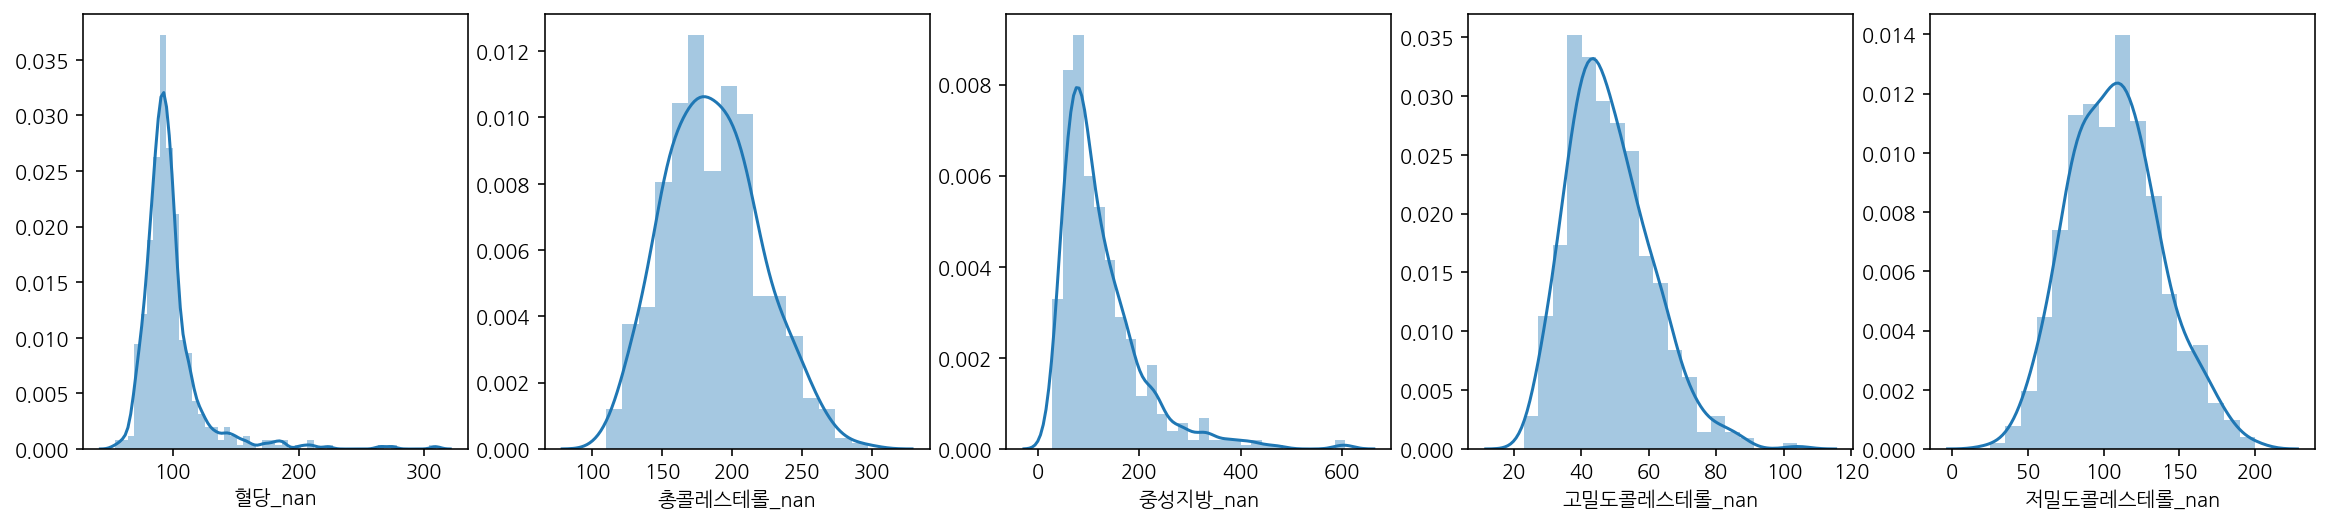

In [376]:
# 랩 결과들 중 한 쪽으로 쏠린 그래프가 없는지 살펴보자.
fig, axes = plt.subplots(ncols=5, figsize=(20,4))
for i, key in enumerate(con_dic):
  col = i % 5  # 나머지 연산자
  sns.distplot(df[con_dic[key]], ax=axes[col])

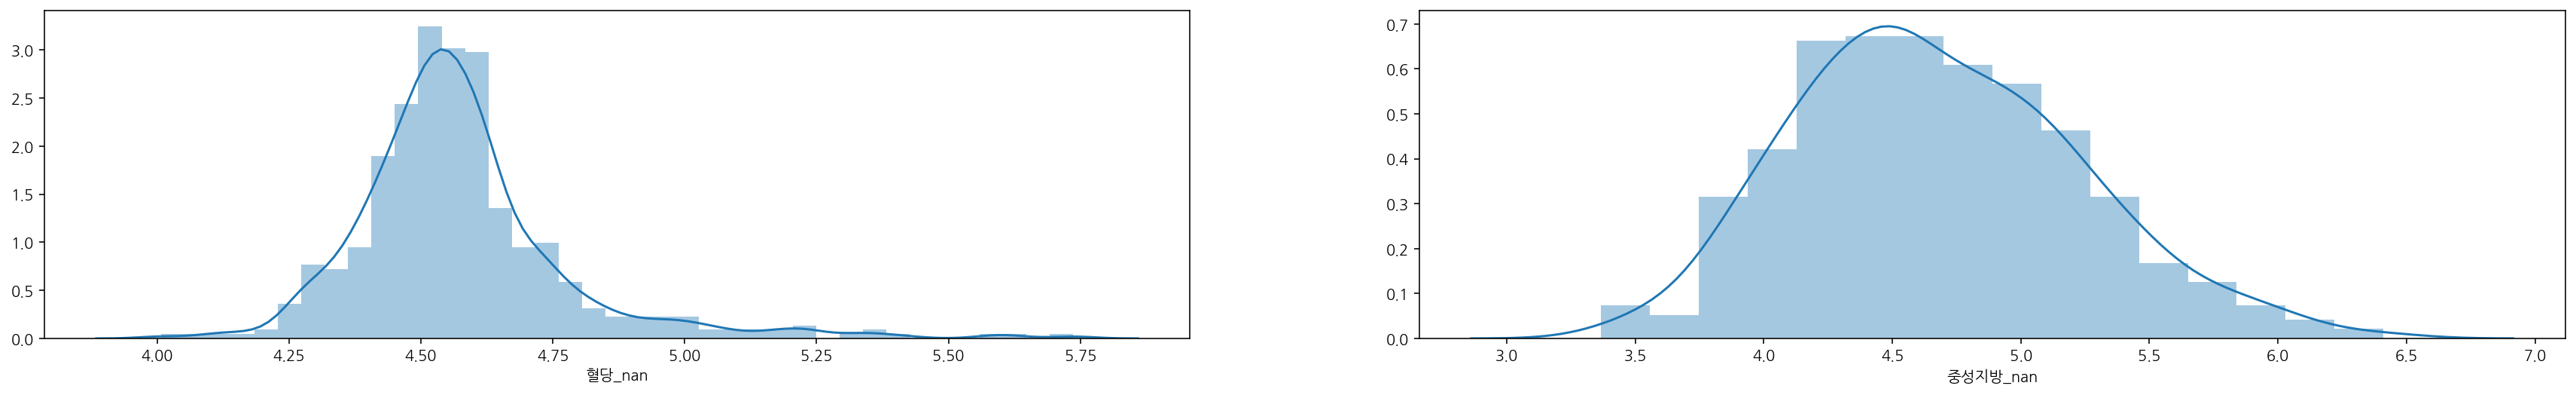

In [377]:
#위 결과를 바탕으로, 혈당_nan과 중성지방_nan을 로그변환을 한 후 그래프를 그려보자.
fig, axes = plt.subplots(ncols=2, figsize=(30,4))
sns.distplot(np.log(df["혈당_nan"] + 1), ax=axes[0])
sns.distplot(np.log(df["중성지방_nan"] + 1), ax=axes[1])

In [378]:
# 위와 같이 정규화를 확인하였으므로, 혈당_log, 중성지방_log 컬럼을 만들어 넣어준다.
df["혈당_log"] = np.log(df["혈당_nan"] + 1)
df["중성지방_log"] = np.log(df["중성지방_nan"] + 1)

## 파생변수 만들기
* EDA에서 해본 상관분석을 바탕으로 파생변수를 생성합니다.

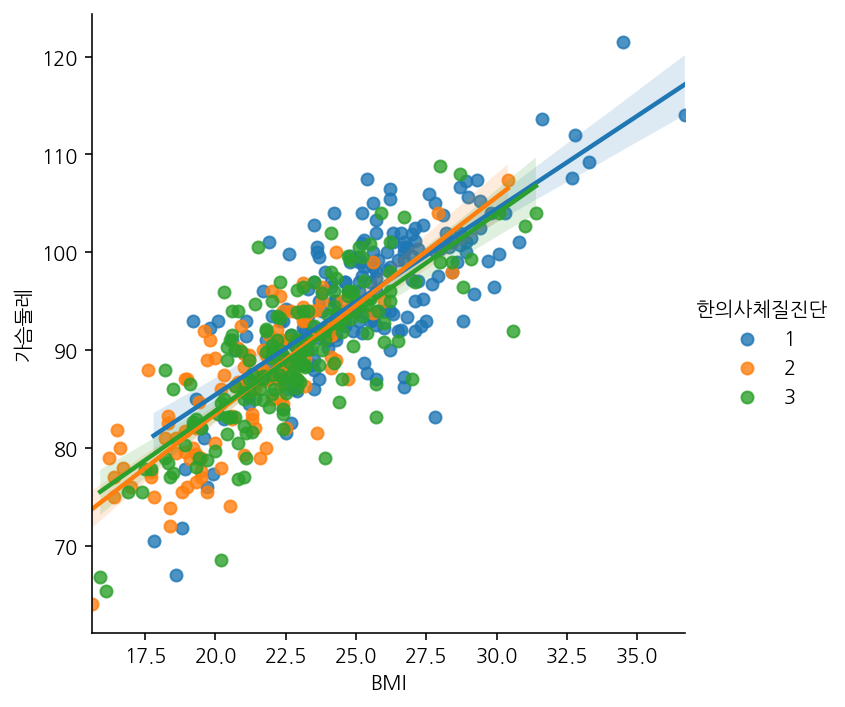

In [404]:
# 상관분석을 통해 BMI와 가슴둘레의 상관계수가 높은 것을 파악하였다.
# 이 때 hue로 outcome을 추가하여 lmplot을 그려봐준다.
# 아래와 그림과 같이 상관계수(기울기)가 높으면서도, 태음인(1)과 소음인(2)이 약간 구별되는 경우 파생변수를 만들어준다.
sns.lmplot(data=df, x="BMI", y="가슴둘레", hue="한의사체질진단")

In [429]:
# lmplot 그래프를 보고 기준이 될만한 값으로 새로운 컬럼(파생변수)을 만들어준다.
df["high_BMI_가슴둘레"] = (df["BMI"] > 26) & (df["가슴둘레"] > 95)
df["high_BMI_가슴둘레"].head()

대상자식별코드
KDCT00001    False
KDCT00002     True
KDCT00003    False
KDCT00004     True
KDCT00005    False
Name: high_BMI_가슴둘레, dtype: bool

In [430]:
# 교차알림표를 만들어준다.
## 이 표를 통해 "high_BMI_가슴둘레"를 만족하는 경우 소음인(2)로 진단될 확률이 확실히 낮다는 것을 알 수 있다.
pd.crosstab(df["한의사체질진단"], df["high_BMI_가슴둘레"])

high_BMI_가슴둘레,False,True
한의사체질진단,,
1,140,60
2,122,3
3,161,14


In [ ]:
# 이러한 파생변수 생성은, 우리가 머신러닝 알고리즘에게 파생변수를 기준으로 나눈 것을 학습하도록 알려주는 것과 같다.

#학습, 예측 데이터셋 나누기

In [431]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

400

In [432]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df[:split_count].copy()
train.shape 

(400, 82)

In [435]:
test = df[split_count:].copy()
test.shape

(100, 82)

In [436]:
 # 학습과 예측에 사용할 컬럼을 만들어 줍니다.
# feature_names 라는 변수에 담아줍니다.
## 이전에 썼던 방법과 달리 먼저 리스트형태로 만든 다음에, remove함수를 통해 제외시켜줍니다.
feature_names = train.columns.tolist()
#1 "한의사체질진단"은 label 값이기 때문에 제외합니다.
#1 "수면시간(시간)_부족"이라는 범주형 변수를 만들어줬으므로, 기존 연속형 변수는 제외합니다.
feature_names.remove("수면시간(시간)")
feature_names.remove("한의사체질진단")

#2 Feature engineering에서 늑골둘레를 범주형 변수로 바꾸어주었으므로, 기존 연속형 변수를 제외합니다.
feature_names.remove("늑골둘레")

#3 혈당의 결측치 값을 채워줬으므로, 기존의 혈당에 대한 칼럼을 제외한다.
feature_names.remove("혈당")

#4-7 결측치 값을 채운 나머지 칼럼에 대해서도, 기존의 칼럼을 제외한다.
feature_names.remove("총콜레스테롤")
feature_names.remove("중성지방")
feature_names.remove("고밀도콜레스테롤")
feature_names.remove("저밀도콜레스테롤")

#8 정규화를 통해 혈당_nan, 중성지방_nan도 대체되었으므로 제외한다.
feature_names.remove("혈당_nan")
feature_names.remove("중성지방_nan")

#9 "high_BMI_가슴둘레"은 파생변수가 추가된 것이므로 그대로 실행한다.

feature_names

## *이전에 썼던 방법 참고
# feature_columns = df.columns.difference(["한의사체질진단"]).tolist()
# feature_columns

['성별',
 '만나이',
 '직업분류',
 '학력',
 '결혼유무',
 '성격_대범_섬세',
 '성격_행동빠름_행동느림',
 '성격_적극_소극',
 '성격_직접_간접',
 '성격_포기빠름_포기느림',
 '성격_외향_내성',
 '성격_동적_정적',
 '성격_쉽게_어렵게',
 '성격_남성적_여성적',
 '성격_참을성부족_잘찾음',
 '성격_큰편_적은편',
 '성격_잘드러냄_안드러냄',
 '성격_잘표현_표현안하는편',
 '성격_가끔흥분_이성적',
 '성격_덜렁_꼼꼼',
 '식사량',
 '식사속도',
 '소화여부',
 '소화입맛',
 '땀정도',
 '땀기분',
 '대변습관',
 '대변굳기',
 '배변시긴박감',
 '배변후잔변감',
 '소변야간뇨',
 '한열민감도',
 '한열손부위',
 '한열발부위',
 '한열배부위',
 '음수정도',
 '음수온다',
 '한열점수',
 '한열그룹',
 '고혈압_진단',
 '당뇨_진단',
 '고지혈증_진단',
 '일반건강',
 '수면시간(분)',
 '피로정도',
 '피로_기상시',
 '피로_오전',
 '피로_오후',
 '피로_밤',
 '피로_하루종일',
 '키',
 '몸무게',
 'BMI',
 '이마둘레',
 '목둘레',
 '겨드랑이둘레',
 '가슴둘레',
 '허리둘레',
 '장골둘레',
 '곡골둘레',
 '수축기혈합',
 '이완기혈압',
 '수면시간(시간)_부족',
 '늑골둘레_low',
 '늑골둘레_middle',
 '늑골둘레_high',
 '총콜레스테롤_nan',
 '고밀도콜레스테롤_nan',
 '저밀도콜레스테롤_nan',
 '혈당_log',
 '중성지방_log',
 'high_BMI_가슴둘레']

In [437]:
 ## 수면시간(분) 항목이 있음을 추가로확인함.
train["수면시간(분)"].value_counts()

0     366
30     28
20      3
40      2
50      1
Name: 수면시간(분), dtype: int64

In [438]:
## 대부분 0분으로 표시하였으므로, 임의로 내림으로 간주하고 해당 컬럼을 삭제함.
feature_names.remove("수면시간(분)")
feature_names

['성별',
 '만나이',
 '직업분류',
 '학력',
 '결혼유무',
 '성격_대범_섬세',
 '성격_행동빠름_행동느림',
 '성격_적극_소극',
 '성격_직접_간접',
 '성격_포기빠름_포기느림',
 '성격_외향_내성',
 '성격_동적_정적',
 '성격_쉽게_어렵게',
 '성격_남성적_여성적',
 '성격_참을성부족_잘찾음',
 '성격_큰편_적은편',
 '성격_잘드러냄_안드러냄',
 '성격_잘표현_표현안하는편',
 '성격_가끔흥분_이성적',
 '성격_덜렁_꼼꼼',
 '식사량',
 '식사속도',
 '소화여부',
 '소화입맛',
 '땀정도',
 '땀기분',
 '대변습관',
 '대변굳기',
 '배변시긴박감',
 '배변후잔변감',
 '소변야간뇨',
 '한열민감도',
 '한열손부위',
 '한열발부위',
 '한열배부위',
 '음수정도',
 '음수온다',
 '한열점수',
 '한열그룹',
 '고혈압_진단',
 '당뇨_진단',
 '고지혈증_진단',
 '일반건강',
 '피로정도',
 '피로_기상시',
 '피로_오전',
 '피로_오후',
 '피로_밤',
 '피로_하루종일',
 '키',
 '몸무게',
 'BMI',
 '이마둘레',
 '목둘레',
 '겨드랑이둘레',
 '가슴둘레',
 '허리둘레',
 '장골둘레',
 '곡골둘레',
 '수축기혈합',
 '이완기혈압',
 '수면시간(시간)_부족',
 '늑골둘레_low',
 '늑골둘레_middle',
 '늑골둘레_high',
 '총콜레스테롤_nan',
 '고밀도콜레스테롤_nan',
 '저밀도콜레스테롤_nan',
 '혈당_log',
 '중성지방_log',
 'high_BMI_가슴둘레']

#정답이자 예측해야될 값

In [439]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = "한의사체질진단"
label_name

'한의사체질진단'

# 학습, 예측 데이터셋 만들기

In [440]:
# 학습 세트 만들기 예) 시험의 기출문제

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(400, 71)


,성별,만나이,직업분류,학력,결혼유무,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,수면시간(시간)_부족,늑골둘레_low,늑골둘레_middle,늑골둘레_high,총콜레스테롤_nan,고밀도콜레스테롤_nan,저밀도콜레스테롤_nan,혈당_log,중성지방_log,high_BMI_가슴둘레
대상자식별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDCT00001,2,48.666,2,5,2,2,2,1,2,1,1,1.0,2.0,2,3,2,2,2,1,1,2.000000,2.0,1,3,3,1.0,1,2,2.490637,2.314607,1.0,1,2,2,2,2.0,2,12.0,2.0,1,1,1,3.0,2,0,0,0,1,0,158.0,55.0,22.0,53.0,33.0,92.0,96.0,82.0,91.0,96.0,120,80,True,False,False,True,219.0,60.0,128.0,4.653960,4.290459,False
KDCT00002,2,80.773,14,3,2,1,1,1,1,1,1,1.0,2.0,1,3,1,1,1,1,3,2.000000,2.0,1,3,1,2.0,1,2,2.490637,2.314607,1.0,2,2,2,2,2.0,3,13.0,3.0,1,1,1,3.0,4,0,0,1,0,0,155.0,63.0,26.2,59.0,35.0,96.0,101.0,92.0,96.0,99.0,124,65,True,False,False,True,199.0,46.0,114.0,4.709530,4.584967,True
KDCT00003,1,50.008,3,3,2,3,1,1,1,1,1,1.0,1.0,1,2,1,1,1,1,3,3.000000,2.0,3,2,3,1.0,1,2,2.490637,2.314607,1.0,3,2,3,2,2.0,2,12.0,2.0,1,1,1,3.0,2,0,0,1,0,0,160.0,59.0,23.0,57.0,37.0,95.0,90.0,80.0,81.0,81.0,121,75,False,False,True,False,216.0,49.0,132.0,4.382027,4.488636,False
KDCT00004,2,50.551,14,4,2,1,1,1,1,1,1,1.0,2.0,1,1,1,2,1,1,2,2.078385,1.0,3,2,2,3.0,2,2,2.490637,2.314607,1.0,2,2,2,2,1.0,2,15.0,3.0,1,1,1,4.0,4,0,0,1,0,0,165.0,76.0,27.9,59.0,37.0,100.0,104.0,91.0,94.0,99.0,113,81,False,False,False,True,218.0,44.0,136.0,4.615121,4.919981,True
KDCT00005,1,49.581,8,2,2,3,2,3,2,2,3,2.0,2.0,2,3,3,2,2,2,1,2.000000,1.0,1,3,1,2.0,1,2,2.490637,2.314607,0.0,1,3,3,2,1.0,2,11.0,2.0,1,1,1,2.0,4,0,0,1,0,0,165.0,70.0,25.7,60.0,40.0,106.0,102.0,98.0,98.0,100.0,129,72,True,False,False,True,186.0,33.0,118.0,4.532599,4.127134,False


In [441]:
 # 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(400,)


대상자식별코드
KDCT00001    2
KDCT00002    3
KDCT00003    2
KDCT00004    2
KDCT00005    1
Name: 한의사체질진단, dtype: int64

In [442]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(100, 71)


,성별,만나이,직업분류,학력,결혼유무,성격_대범_섬세,성격_행동빠름_행동느림,성격_적극_소극,성격_직접_간접,성격_포기빠름_포기느림,성격_외향_내성,성격_동적_정적,성격_쉽게_어렵게,성격_남성적_여성적,성격_참을성부족_잘찾음,성격_큰편_적은편,성격_잘드러냄_안드러냄,성격_잘표현_표현안하는편,성격_가끔흥분_이성적,성격_덜렁_꼼꼼,식사량,식사속도,소화여부,소화입맛,땀정도,땀기분,대변습관,대변굳기,배변시긴박감,배변후잔변감,소변야간뇨,한열민감도,한열손부위,한열발부위,한열배부위,음수정도,음수온다,한열점수,한열그룹,고혈압_진단,당뇨_진단,고지혈증_진단,일반건강,피로정도,피로_기상시,피로_오전,피로_오후,피로_밤,피로_하루종일,키,몸무게,BMI,이마둘레,목둘레,겨드랑이둘레,가슴둘레,허리둘레,장골둘레,곡골둘레,수축기혈합,이완기혈압,수면시간(시간)_부족,늑골둘레_low,늑골둘레_middle,늑골둘레_high,총콜레스테롤_nan,고밀도콜레스테롤_nan,저밀도콜레스테롤_nan,혈당_log,중성지방_log,high_BMI_가슴둘레
대상자식별코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KDCT00401,2,56.074,14,2,2,1,1,1,1,2,1,1.0,2.0,2,3,1,2,2,1,2,1.000000,1.0,1,2,2,3.0,1,2,3.0,3.0,3.0,2,2,2,2,3.0,3,12.0,2.0,1,2,1,4.0,3,0,0,1,0,0,158.0,59.0,23.6,54.0,36.0,92.0,100.0,85.0,93.0,95.0,100,60,False,False,False,True,191.0,36.0,122.0,5.236442,5.308268,False
KDCT00402,2,49.726,4,2,2,3,2,2,2,2,3,2.0,3.0,3,3,2,3,2,2,3,2.000000,1.0,1,2,2,3.0,2,1,1.0,2.0,1.0,2,2,2,3,3.0,2,12.0,2.0,1,1,1,4.0,2,0,0,0,1,0,158.0,55.5,22.2,57.3,35.0,91.7,93.5,81.5,88.5,91.5,100,60,False,False,True,False,149.0,36.0,90.0,4.290459,4.564348,False
KDCT00403,2,48.666,14,3,2,2,2,2,3,3,2,2.0,2.0,2,2,1,2,2,1,1,2.078385,1.0,1,3,1,1.0,1,2,2.0,2.0,1.0,3,3,3,3,3.0,3,8.0,1.0,1,1,1,5.0,3,1,0,0,1,0,160.0,54.0,21.1,54.3,34.0,89.5,79.0,74.5,80.0,84.5,114,76,False,False,True,False,148.0,43.0,55.0,4.736198,5.049856,False
KDCT00404,1,39.411,5,4,2,3,3,1,1,1,1,1.0,1.0,1,2,1,3,1,1,1,2.000000,1.0,1,1,3,1.0,1,1,3.0,1.0,1.0,1,1,3,3,4.0,3,10.0,2.0,1,1,1,4.0,3,0,0,1,0,0,173.0,80.0,26.7,57.5,37.5,104.5,100.5,101.0,101.5,103.5,112,85,False,False,False,True,213.0,44.0,126.0,4.859812,6.410175,True
KDCT00405,1,54.970,7,4,2,2,1,1,2,3,3,2.0,1.0,1,2,1,1,1,1,2,3.000000,1.0,1,4,2,1.0,1,2,3.0,3.0,3.0,1,2,2,3,1.0,3,11.0,2.0,2,1,1,4.0,3,0,0,1,0,0,158.0,63.0,25.2,57.0,39.0,96.0,91.7,90.3,91.9,90.8,128,85,False,False,False,True,146.0,51.0,70.0,4.804021,5.181784,False


In [443]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]

print(y_test.shape)
y_test.head()

(100,)


대상자식별코드
KDCT00401    1
KDCT00402    3
KDCT00403    3
KDCT00404    1
KDCT00405    1
Name: 한의사체질진단, dtype: int64

# 머신러닝 알고리즘 가져오기

In [444]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [445]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

# 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [446]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 2, 3, 3, 3])

# 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

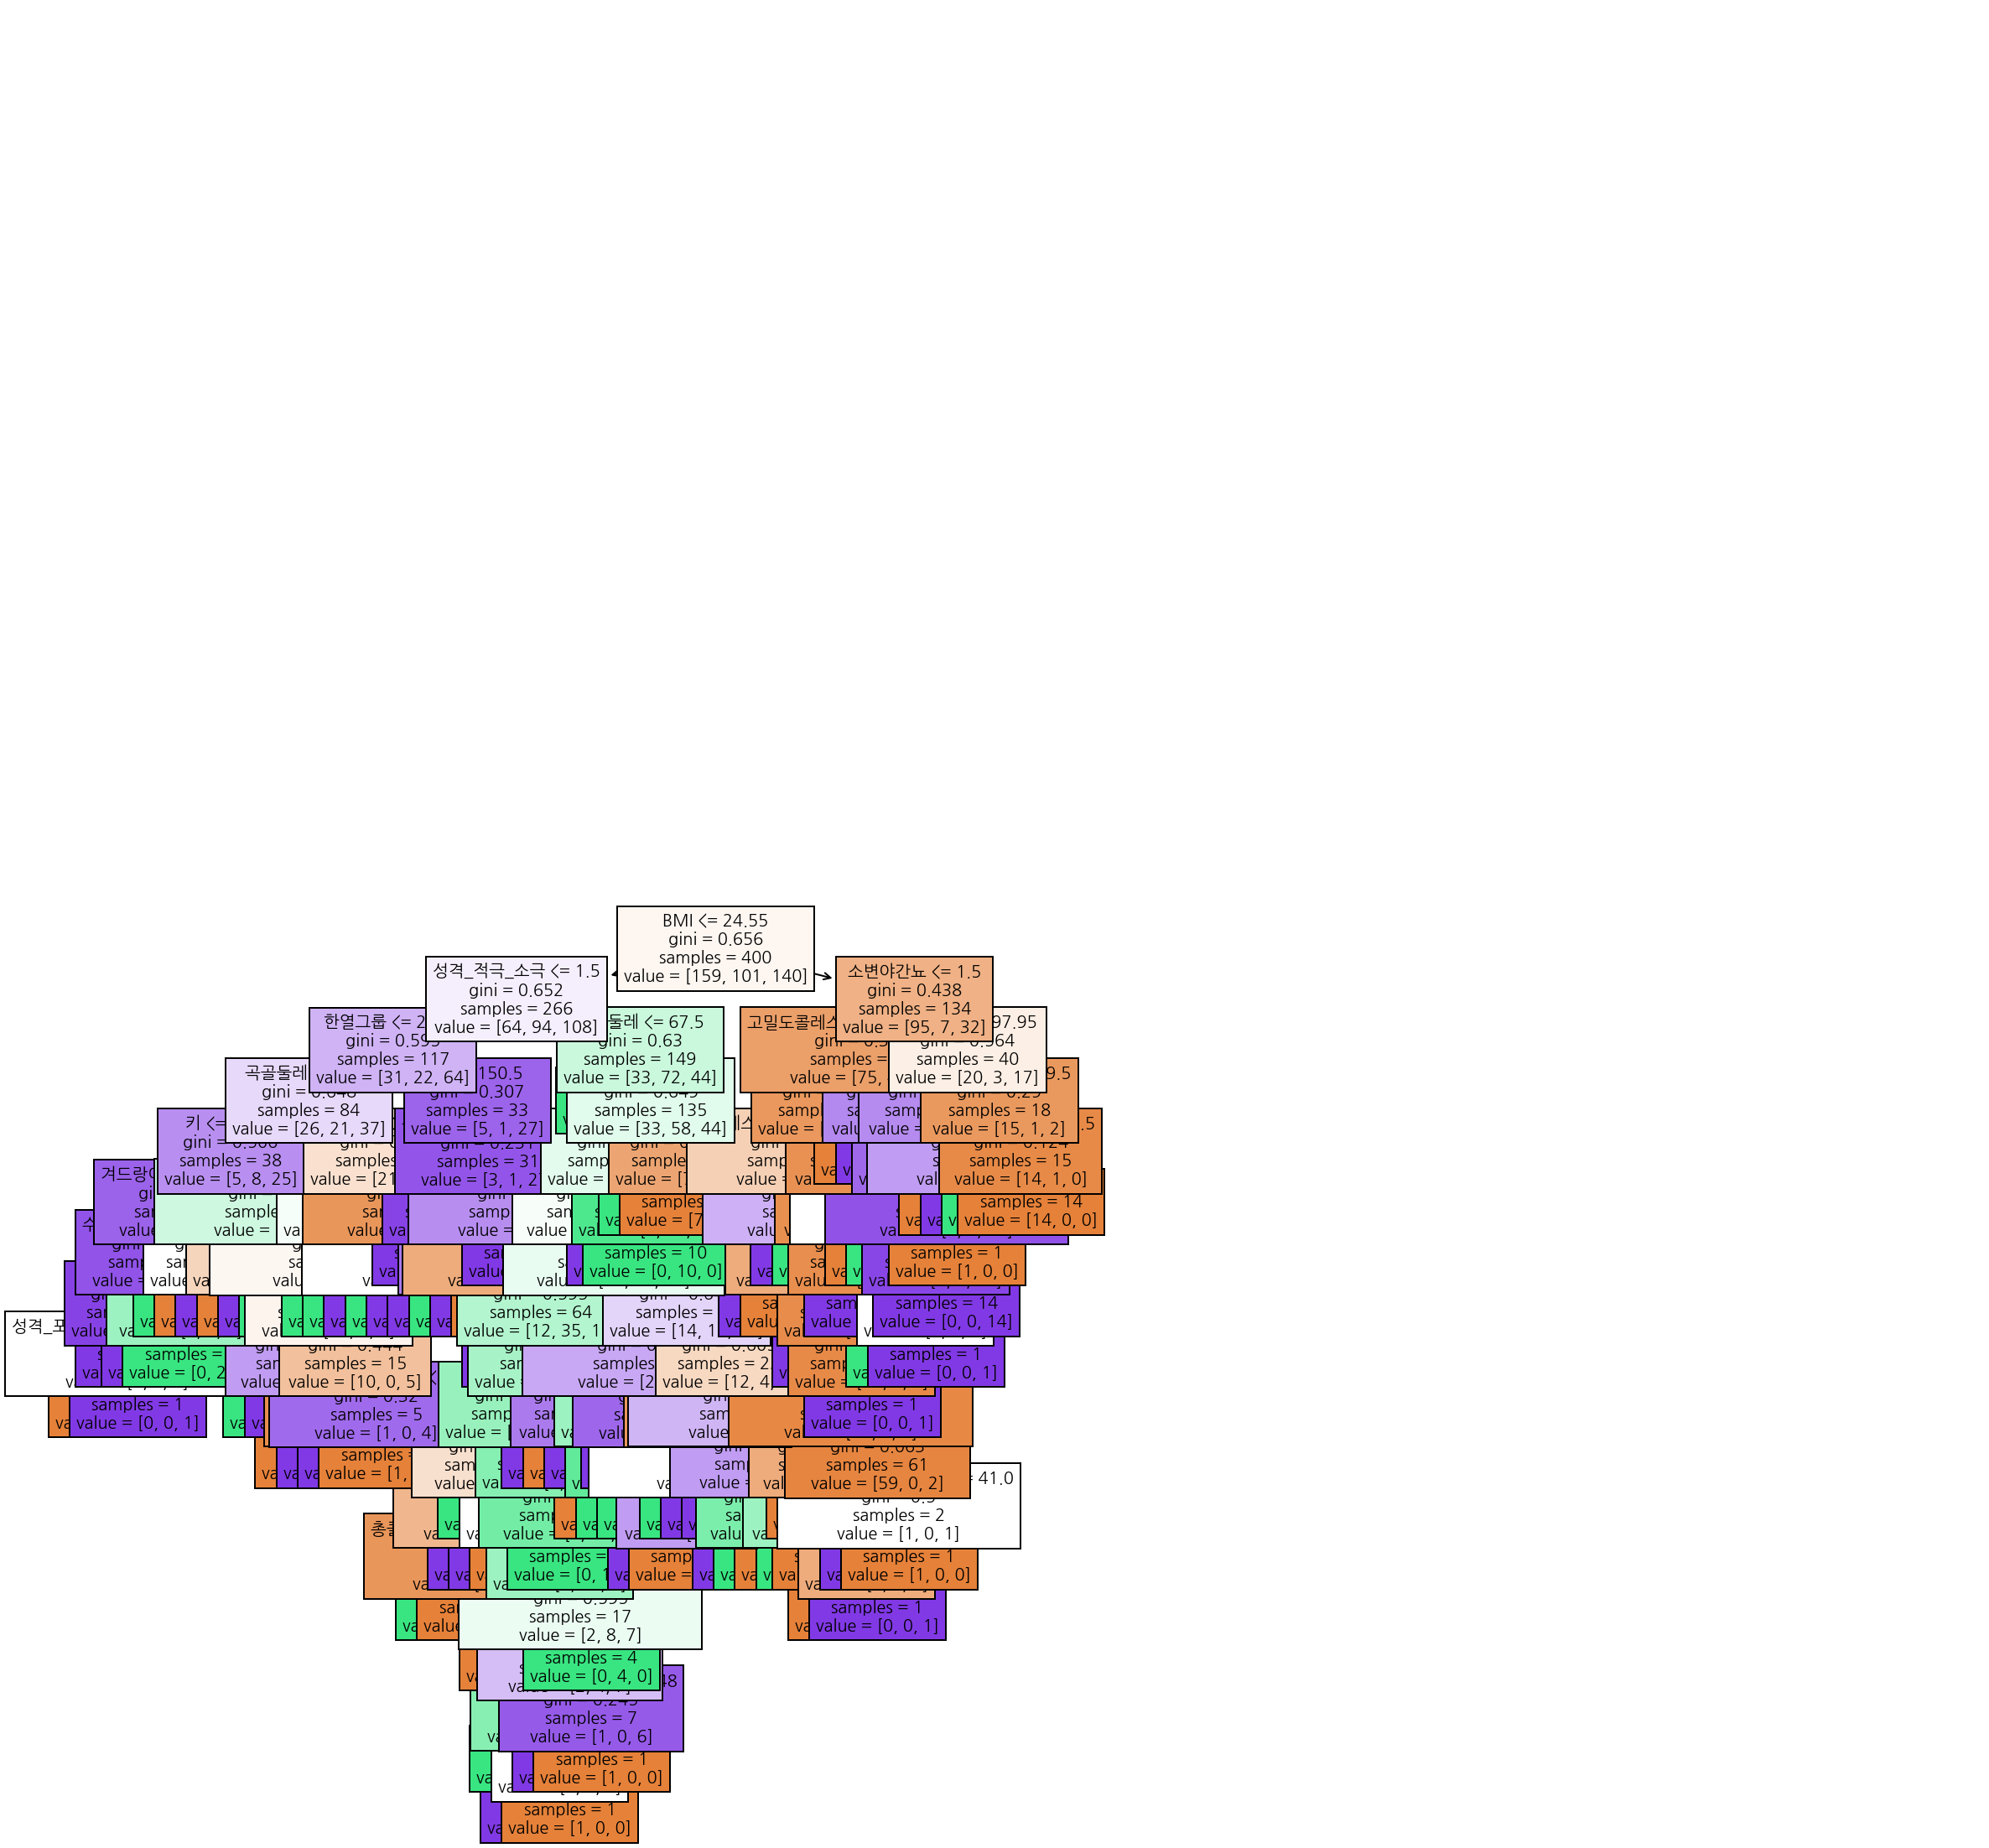

In [447]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

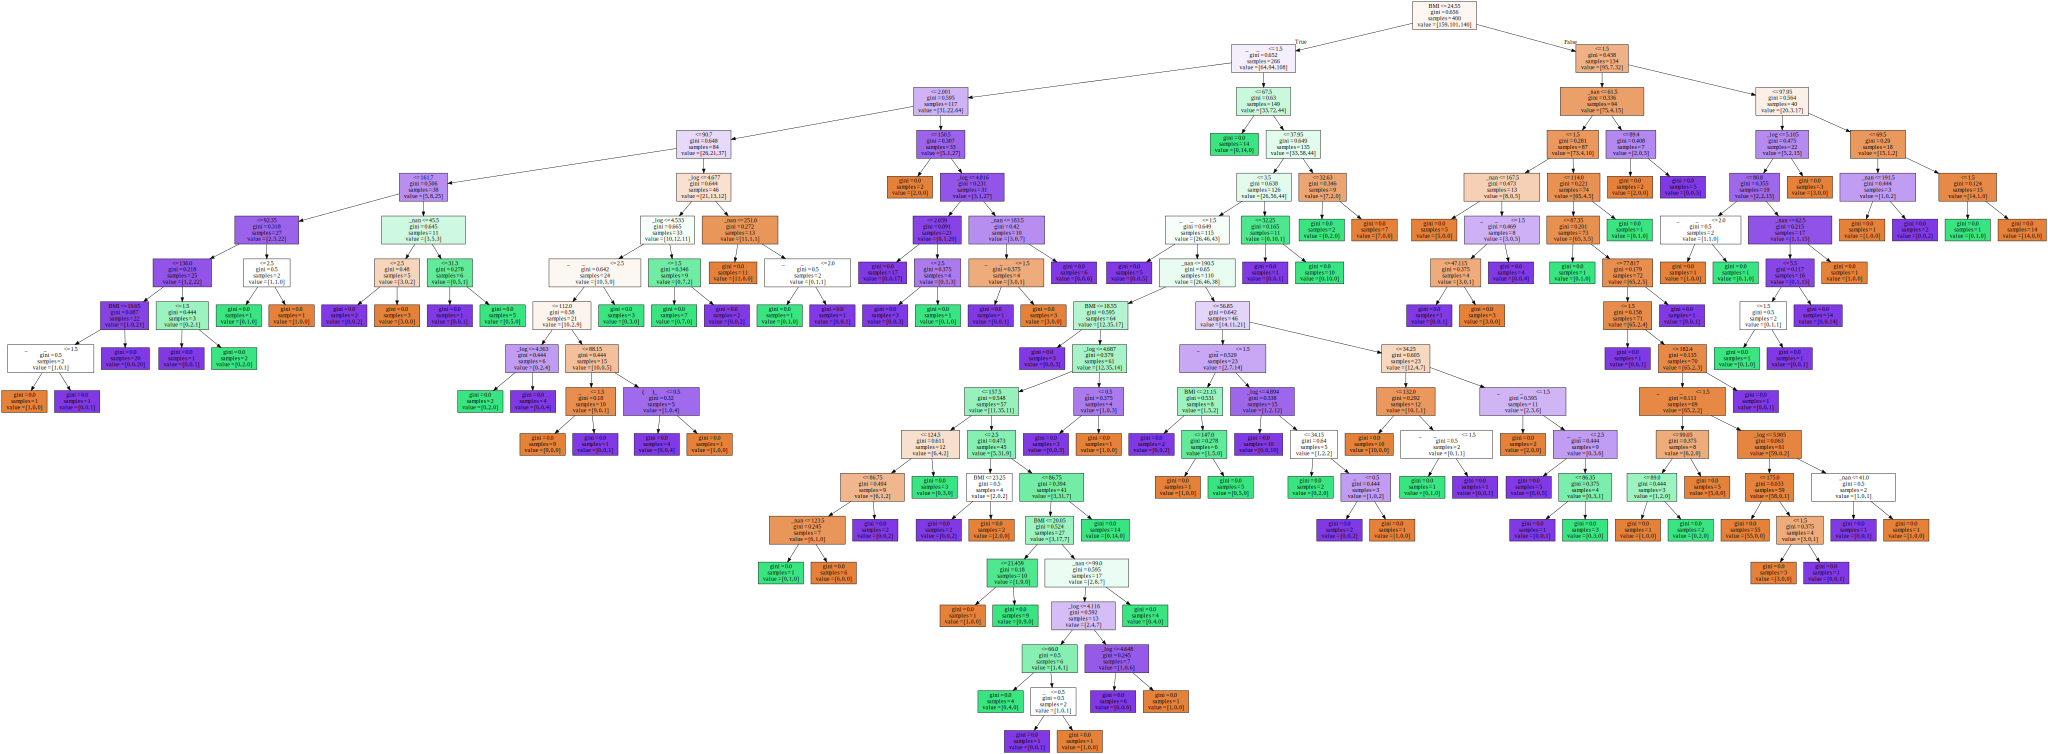

In [448]:
#graphviz 를 통해 시각화 합니다.
#graphviz 는 별도의 설치가 필요합니다. 
#graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해 주셔야 합니다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names = feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [449]:
# 피처의 중요도를 추출하기
model.feature_importances_

array([0.        , 0.0309442 , 0.01002354, 0.        , 0.00571875,
       0.01201917, 0.        , 0.03807457, 0.        , 0.01470576,
       0.        , 0.        , 0.        , 0.01429688, 0.01269096,
       0.        , 0.0038125 , 0.01611236, 0.0038125 , 0.00953125,
       0.00154316, 0.        , 0.        , 0.01494231, 0.00915   ,
       0.        , 0.0038125 , 0.00727652, 0.        , 0.00711667,
       0.01714118, 0.01186111, 0.        , 0.        , 0.00508333,
       0.0038125 , 0.00571875, 0.        , 0.01950114, 0.        ,
       0.0068625 , 0.        , 0.01198097, 0.        , 0.        ,
       0.00571875, 0.00508333, 0.0038125 , 0.        , 0.04981269,
       0.01309511, 0.15475624, 0.        , 0.05109177, 0.02623361,
       0.01235581, 0.04926419, 0.01089286, 0.06031093, 0.03981627,
       0.01533473, 0.0061    , 0.        , 0.        , 0.        ,
       0.0555304 , 0.03858674, 0.00924661, 0.06293651, 0.03247585,
       0.        ])

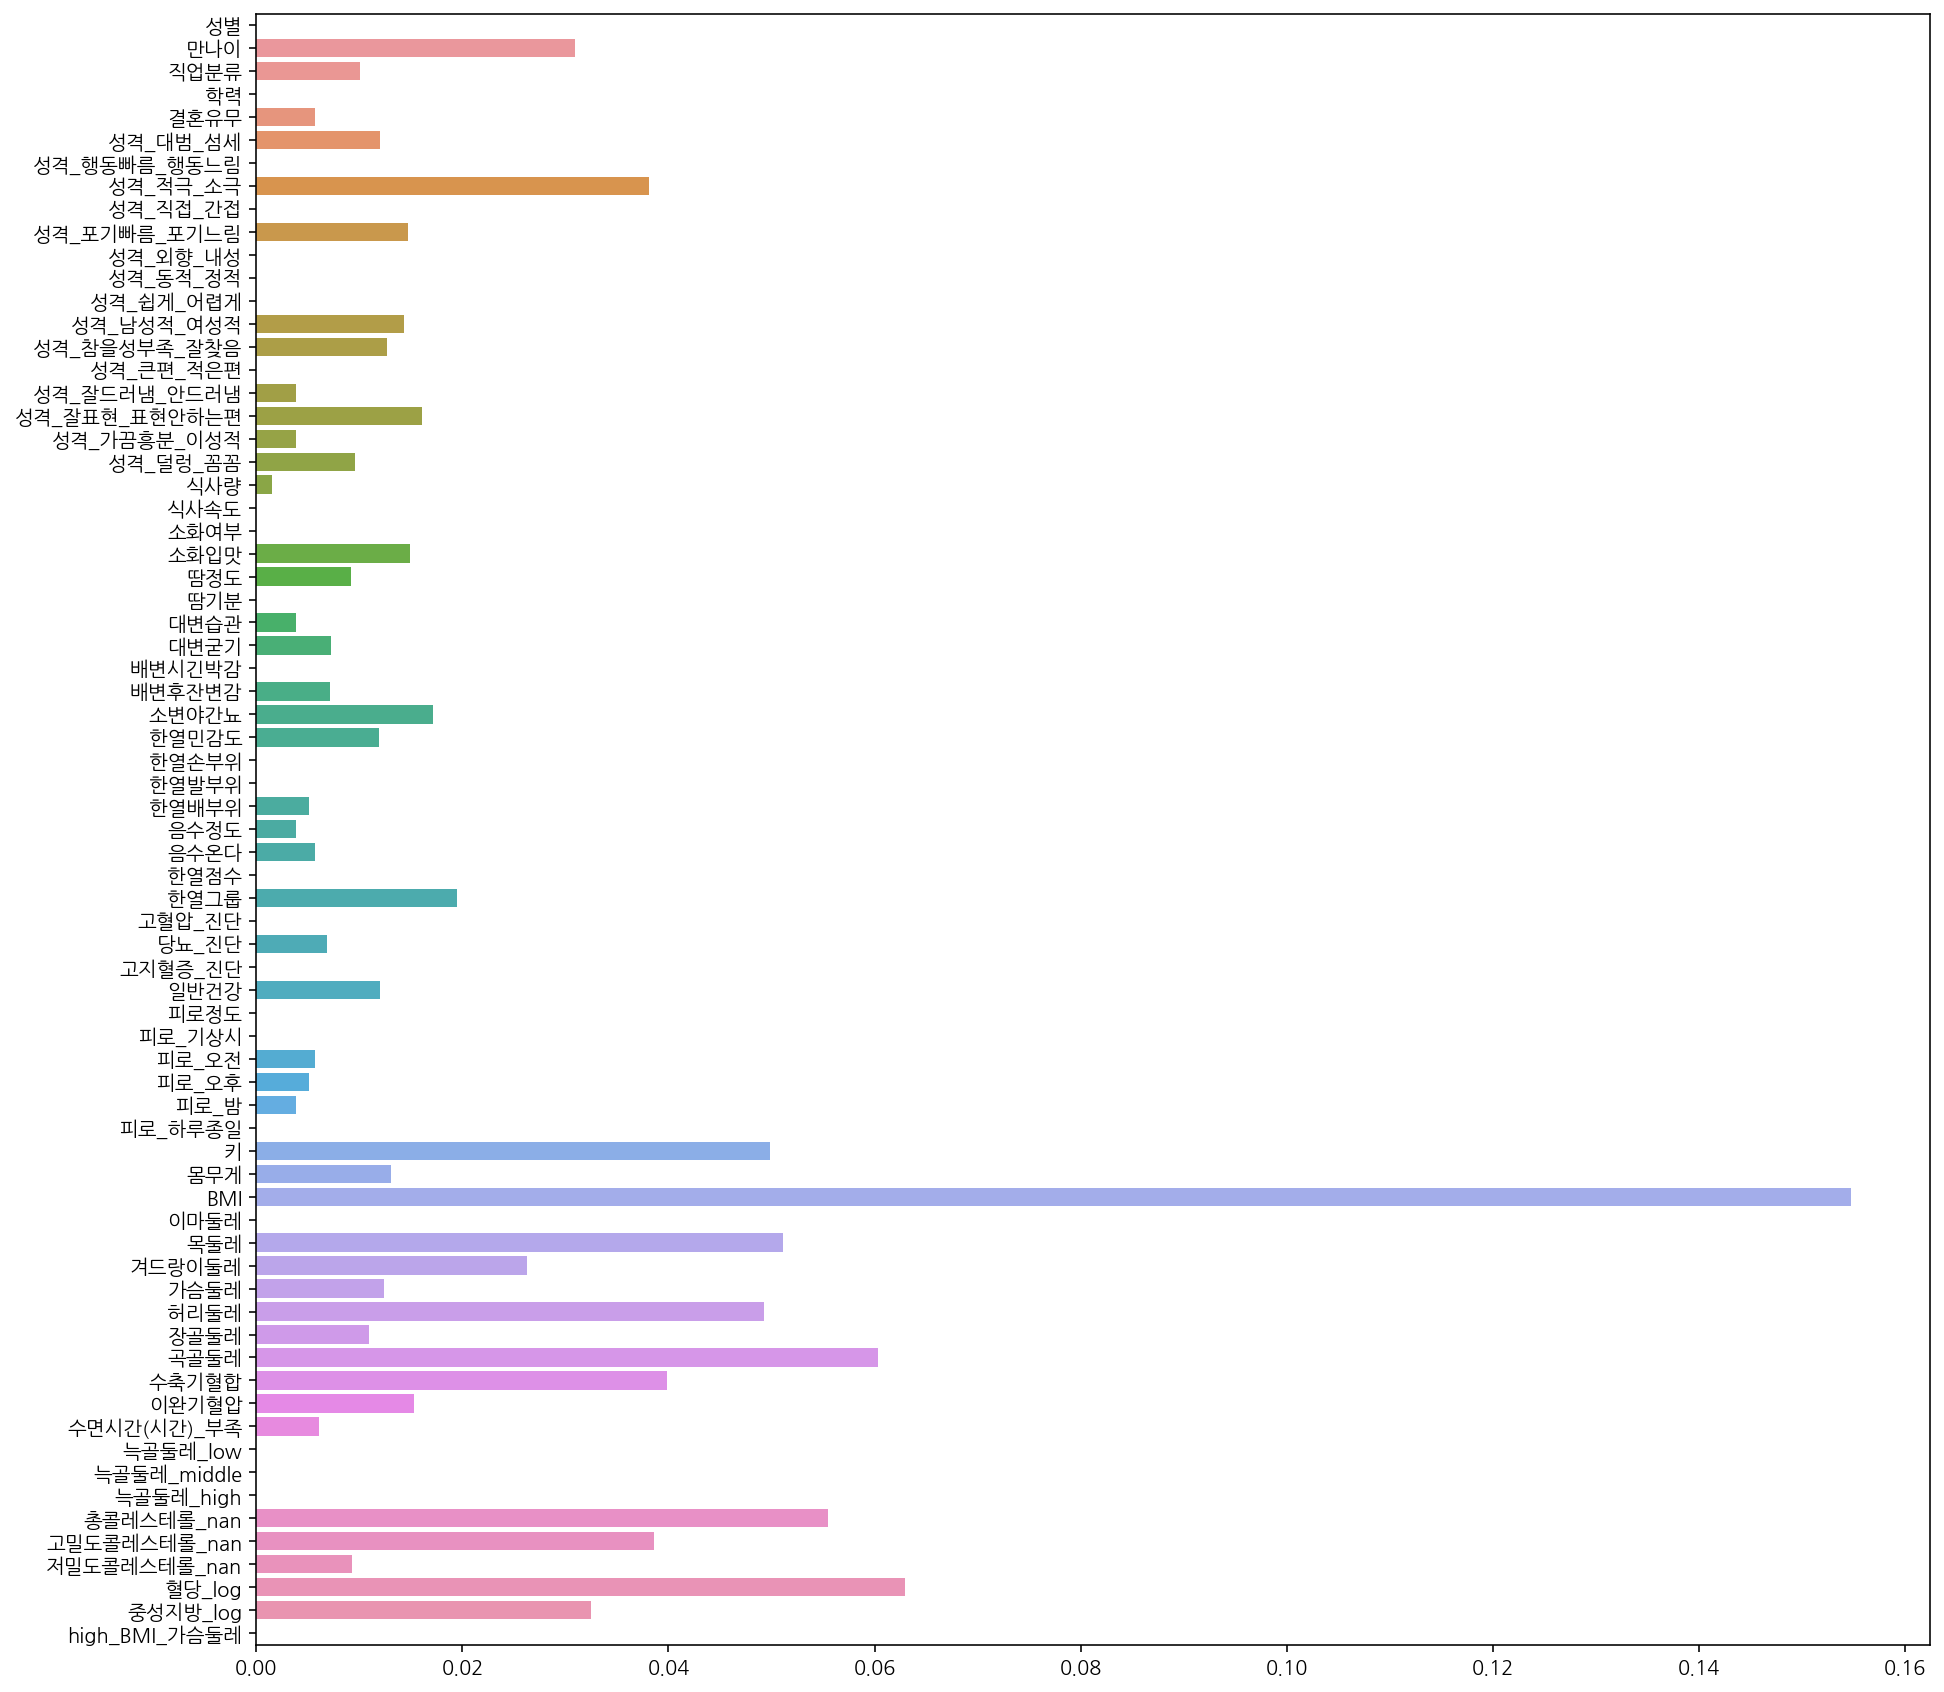

In [450]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(15,15))
sns.barplot(x=model.feature_importances_, y=feature_names)

In [451]:
## 새로 만드는 컬럼들은 맨 마지막의 열에 생기므로 그래프의 맨 아래를 보면 된다.
#1 수면시간(시간) 부족의 변수화 후 변수 중요도가 조금은 있는 것을 확인할 수 있다.
#2 늑골둘레의 변수형 변수화 후 위의 그래프를 보았을 때는 중요도가 거의 없다.
#3 혈당의 중요도가 이전보다 증가한 것을 알 수 있다.
#4-6 혈당, 총콜레스테롤, 중성지방, 고/저밀도콜레스테롤 중 혈당의 중요도가 확연히 높아진 것을 알 수 있다.
#7 키, 혈당, 허리둘레 등의 중요도가 높아진 것을 알 수 있다.
#8 고밀도콜레스테롤 가중지가 조금 높아지고 혈당가중치가 조금 낮아지는 등 약간의 차이만 보인다.
#9 새로운 파생변수 "high_BMI_가슴둘레"의 영향은 그닥 없는 것으로 보인다. 오히려 BMI만 높아졌다.

# 정확도(Accuracy) 측정하기

In [452]:
# 예측의 정확도를 구해봅니다.
y_predict_list = y_predict.tolist()
y_test_list = y_test.tolist()
acc = 0
for i in range(len(y_predict_list)):
  if y_predict_list[i] == y_test_list[i]:
    acc += 1
print("정확도 : ", acc/len(y_predict_list))

정확도 :  0.5


In [453]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

50.0

In [454]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test) * 100

50.0

In [455]:
#1 기본 decision_tree model: acc 46%
#2 수면시간(시간)의 범주화 후: acc 53%
#3 늑골둘레의 범주화 후: acc 56%
#4 혈당의 결측치를 평균값으로 채운 후 : acc 55%
#5 혈당의 결측치를 중앙값으로 채운 후 : acc 55%
#6 혈당, 총콜레스테롤, 중성지방, 고/저밀도밀도콜레스테롤 결측치 처리 후 : acc 55%
#7 (6 제외하고) 모든 결측치에 대해 결측치가 250이상이면 해당열을 삭제하고, 나머지는 평균값으로 처리 후: acc 53%
#8 혈당_nan과 중성지방_nan을 로그변환을 통한 정규화 후: acc 54%
#9 "high_BMI_가슴둘레"의 파생변수 생성후: acc 50% 